In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("sales_dataset.csv")
print(df)

   OrderID Customer     Product     Category  Quantity  Price   OrderDate
0     1001    Alice       Phone  Electronics         1    699  2024-01-15
1     1002      Bob      Laptop  Electronics         1   1200  2024-01-12
2     1003  Charlie        Book   Stationery         3     15  2024-02-02
3     1004    Alice  Headphones  Electronics         2    199  2024-02-20
4     1005      Eva         Pen   Stationery        10      2  2024-03-01
5     1006    David      Tablet  Electronics         1    450  2024-03-05
6     1007      Bob    Notebook   Stationery         5      5  2024-03-12
7     1008    Fiona      Camera  Electronics         1    850  2024-03-18
8     1009   George        Book   Stationery         2     12  2024-04-01
9     1010      Eva       Phone  Electronics         1    699  2024-04-07


In [16]:
# Level 1: Basics
# How many rows and columns does it have?
print("Rows and Columns is:",df.shape)
print("**************************************")

#What are the data types of each column?
print("the data types of each column:\n",df.dtypes)
print("**************************************")

#Select only the rows where Category = "Stationery".
rows =  df[df["Category"]=="Stationery"]
print(rows)
print("**************************************")

#Show only the Customer, Product, and Quantity
selected_column = df[["Customer","Product","Quantity"]]
print(selected_column)
print("**************************************")

#Find all orders made by Alice.
print(df[df["Customer"] == "Alice"])


Rows and Columns is: (10, 7)
**************************************
the data types of each column:
 OrderID       int64
Customer     object
Product      object
Category     object
Quantity      int64
Price         int64
OrderDate    object
dtype: object
**************************************
   OrderID Customer   Product    Category  Quantity  Price   OrderDate
2     1003  Charlie      Book  Stationery         3     15  2024-02-02
4     1005      Eva       Pen  Stationery        10      2  2024-03-01
6     1007      Bob  Notebook  Stationery         5      5  2024-03-12
8     1009   George      Book  Stationery         2     12  2024-04-01
**************************************
  Customer     Product  Quantity
0    Alice       Phone         1
1      Bob      Laptop         1
2  Charlie        Book         3
3    Alice  Headphones         2
4      Eva         Pen        10
5    David      Tablet         1
6      Bob    Notebook         5
7    Fiona      Camera         1
8   George      

In [28]:
# Level 2: Filtering & Sorting
# Show all orders where the Price > 500.
print(df[df["Price"] > 500])
print("**************************************")

# Find all orders made after "2024-03-01".
print(df[df["OrderDate"] > "2024-03-01"])
print("**************************************")

# Sort all orders by OrderDate (ascending).
df.sort_values(by="OrderDate", ascending=True, inplace=True)
print(df)


   OrderID Customer Product     Category  Quantity  Price   OrderDate
0     1001    Alice   Phone  Electronics         1    699  2024-01-15
1     1002      Bob  Laptop  Electronics         1   1200  2024-01-12
7     1008    Fiona  Camera  Electronics         1    850  2024-03-18
9     1010      Eva   Phone  Electronics         1    699  2024-04-07
**************************************
   OrderID Customer   Product     Category  Quantity  Price   OrderDate
5     1006    David    Tablet  Electronics         1    450  2024-03-05
6     1007      Bob  Notebook   Stationery         5      5  2024-03-12
7     1008    Fiona    Camera  Electronics         1    850  2024-03-18
8     1009   George      Book   Stationery         2     12  2024-04-01
9     1010      Eva     Phone  Electronics         1    699  2024-04-07
**************************************
   OrderID Customer     Product     Category  Quantity  Price   OrderDate
1     1002      Bob      Laptop  Electronics         1   1200  202

In [49]:
# Level 3: Aggregation
# Create a new column Revenue = Quantity × Price.
df["Revenue"] = df["Quantity"] * df["Price"]
print(df)
print("**************************************")

# Find the total quantity of products sold per category.
total_quantity_per_category = df.groupby("Category")["Quantity"].sum()
print(total_quantity_per_category)
print("**************************************")


# Which product had the highest total revenue?
highest_max_index = df["Price"].argmax()
print(df["Product"][highest_max_index])


   OrderID Customer     Product     Category  Quantity  Price   OrderDate  \
0     1001    Alice       Phone  Electronics         1    699  2024-01-15   
1     1002      Bob      Laptop  Electronics         1   1200  2024-01-12   
2     1003  Charlie        Book   Stationery         3     15  2024-02-02   
3     1004    Alice  Headphones  Electronics         2    199  2024-02-20   
4     1005      Eva         Pen   Stationery        10      2  2024-03-01   
5     1006    David      Tablet  Electronics         1    450  2024-03-05   
6     1007      Bob    Notebook   Stationery         5      5  2024-03-12   
7     1008    Fiona      Camera  Electronics         1    850  2024-03-18   
8     1009   George        Book   Stationery         2     12  2024-04-01   
9     1010      Eva       Phone  Electronics         1    699  2024-04-07   

   Revenue  
0      699  
1     1200  
2       45  
3      398  
4       20  
5      450  
6       25  
7      850  
8       24  
9      699  
*********

In [76]:
# Level 5: Date & Time
# Convert OrderDate to a datetime type.
df = pd.read_csv("sales_dataset.csv")
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
print(df["OrderDate"].dtype)
print(df.head())
print("**************************************")

# Find the total sales per month.
df["OrderDate"] = pd.to_datetime(df["OrderDate"])

df["Revenue"] = df["Quantity"] * df["Price"]

# Extract the month (numeric) and year-month (for grouping)
df["Month"] = df["OrderDate"].dt.to_period("M")

df = df.groupby("Month")["Revenue"].sum()
print(df)
print("**************************************")

# Which month had the highest sales revenue?
df = pd.read_csv("sales_dataset.csv")
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["Revenue"] = df["Quantity"] * df["Price"]
df["Month"] = df["OrderDate"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Revenue"].sum()
best_month = monthly_sales.idxmax()
highest_revenue = monthly_sales.max()

print(f"The month with the highest sales revenue is {best_month}: {highest_revenue}")

datetime64[ns]
   OrderID Customer     Product     Category  Quantity  Price  OrderDate
0     1001    Alice       Phone  Electronics         1    699 2024-01-15
1     1002      Bob      Laptop  Electronics         1   1200 2024-01-12
2     1003  Charlie        Book   Stationery         3     15 2024-02-02
3     1004    Alice  Headphones  Electronics         2    199 2024-02-20
4     1005      Eva         Pen   Stationery        10      2 2024-03-01
**************************************
Month
2024-01    1899
2024-02     443
2024-03    1345
2024-04     723
Freq: M, Name: Revenue, dtype: int64
**************************************
The month with the highest sales revenue is 2024-01: 1899


Month        2024-01  2024-02  2024-03  2024-04
Category                                       
Electronics     1899      398     1300      699
Stationery         0       45       45       24
**************************************
Customer
Bob      1225
Alice    1097
Name: Revenue, dtype: int64


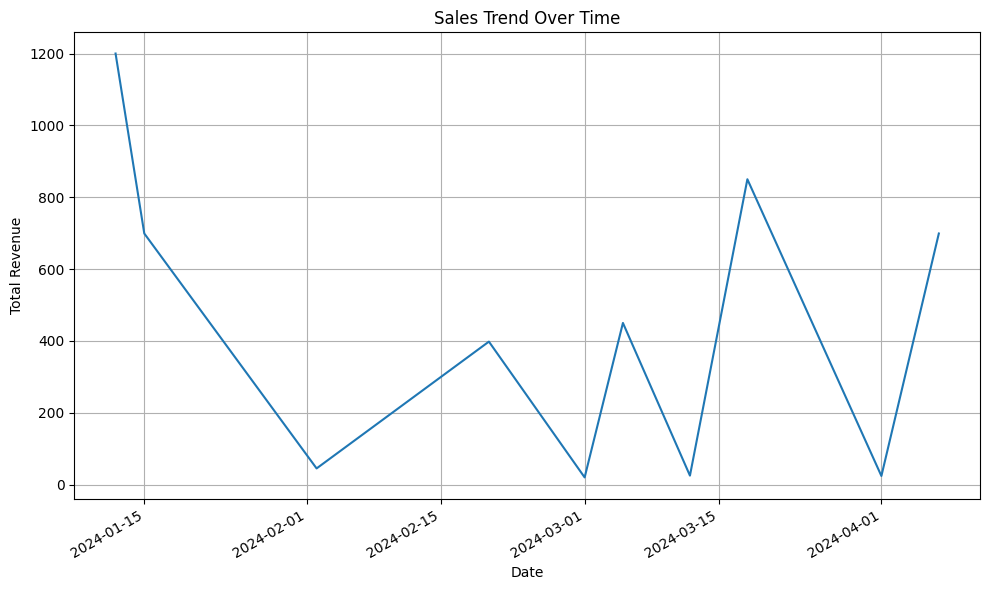

In [3]:
# Level 6: Advanced
# Create a pivot table showing Category vs. Month with total Revenue.
# Convert OrderDate to datetime
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
# Add Revenue column
df["Revenue"] = df["Quantity"] * df["Price"]
# Extract Year-Month
df["Month"] = df["OrderDate"].dt.to_period("M")

# Create pivot table: Category vs. Month
pivot = pd.pivot_table(
    df,
    values="Revenue",
    index="Category",
    columns="Month",
    aggfunc="sum",
    fill_value=0 
)
print(pivot)
print("**************************************")


#Find the top 2 customers by revenue.
df["Revenue"] = df["Quantity"] * df["Price"]
customers_revenue = df.groupby("Customer")["Revenue"].sum()
# print(customers_revenue)
top_customers = customers_revenue.sort_values(ascending=False).head(2)
print(top_customers)


#Visualize sales trend (Revenue over time) with matplotlib or pandas.plot().
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["Revenue"] = df["Quantity"] * df["Price"]
df.groupby("OrderDate")["Revenue"].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid()
plt.tight_layout()
plt.show()